In [4]:
%matplotlib inline
import sys
import torch
import pandas as pd
import matplotlib.pyplot as plt

from model.training.rollout_data import RolloutDataset as Buffer
from utils.pytorch_utils import DEVICE
import seaborn as sns


print(f"python {sys.version}")
print(f"torch {torch.__version__}")
print(f"device = {DEVICE}")


python 3.10.13 (main, Sep 11 2023, 08:16:02) [Clang 14.0.6 ]
torch 2.2.1
device = mps


In [5]:
import pickle
with open('simulations/cnn_vae_atari_Pong-v5_2024-06-04_batched_data.pkl', 'rb') as f:
    cnnvae_pong = pickle.load(f)



/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nicholasfranklin/miniconda3/envs/state_inference/lib/python3.10/site-packag

<Axes: xlabel='num_timesteps', ylabel='cumulative_reward'>

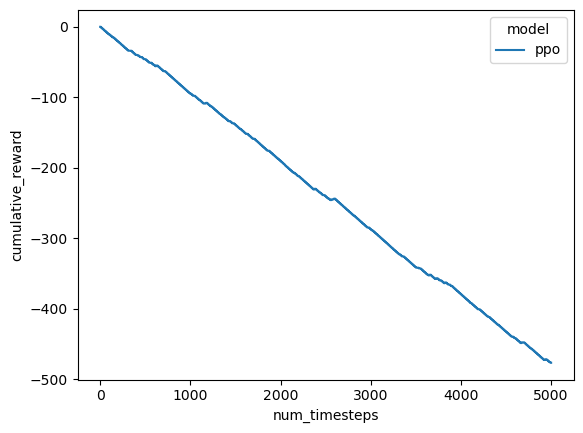

In [6]:
reward_df = []
for ii, data in enumerate(cnnvae_pong):
    _rew = pd.DataFrame(data['rewards'])
    _rew['batch'] = ii
    _rew['cumulative_reward'] = _rew['rewards'].cumsum()
    _rew['model'] = 'ppo'
    reward_df.append(_rew)

for ii, data in enumerate(cnnvae_batch_data):
    _rew = pd.DataFrame(data['rewards'])
    _rew['batch'] = ii
    _rew['cumulative_reward'] = _rew['rewards'].cumsum()
    _rew['model'] = 'vi'
    reward_df.append(_rew)

# for ii, data in enumerate(lookahead_batched_data):
#     _rew = pd.DataFrame(data['rewards'])
#     _rew['batch'] = ii
#     _rew['cumulative_reward'] = _rew['rewards'].cumsum()
#     _rew['model'] = 'vi-lookahead'
#     reward_df.append(_rew)
reward_df = pd.concat(reward_df)
sns.lineplot(data=reward_df, x='num_timesteps', y='cumulative_reward', hue='model', errorbar=None)
